In [1]:
import pandas as pd
df=pd.read_csv('StudentsPerformance.csv') # reading the dataset
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


### 1. Find out how many males and females participated in the test

In [2]:
df1=df.groupby('gender')['gender'].count().reset_index(name='count') # displays counts of each gender
df1

,gender,count
0,female,518
1,male,482


[Text(0, 0, '518'), Text(0, 0, '482')]

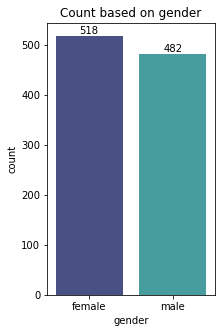

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(3,5))
plt.title('Count based on gender')
ax=sns.barplot(x='gender', y="count", data=df1, palette='mako')
ax.bar_label(ax.containers[0])

### 2. What do you think about the students' parental level of education

In [6]:
df2=df.groupby('parental level of education')['parental level of education'].count().reset_index(name='count') # displays count based on parental level of education
df2.rename(columns={'parental level of education':'Parental_level_of_education'}, inplace=True)
df2

,Parental_level_of_education,count
0,associate's degree,222
1,bachelor's degree,118
2,high school,196
3,master's degree,59
4,some college,226
5,some high school,179


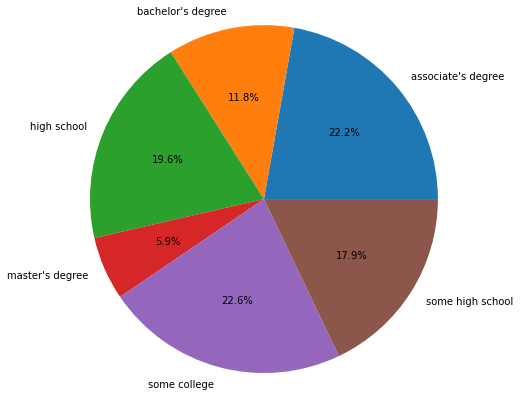

In [7]:
plt.pie(data=df2, x="count",labels='Parental_level_of_education', autopct = '%0.1f%%', radius=2)
plt.show()

As per the above chart the largest fraction of parents(22.6%) have some college education
It is also inferred that around 40% of the parents are degree holders

### 3. Who scores the most on average for math, reading and writing based on a) Gender

In [9]:
df['Avg'] = df[['math score', 'reading score','writing score']].mean(axis=1).round(2) # finding the avg of scores for each row
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avg
0,female,group C,some high school,free/reduced,none,0,17,10,9.00
1,female,group B,high school,free/reduced,none,8,24,23,18.33
2,female,group B,some high school,free/reduced,none,18,32,28,26.00
3,female,group B,some college,standard,none,11,38,32,27.00
4,female,group C,some college,free/reduced,none,22,39,33,31.33
...,...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81,89.00
996,male,group A,some college,standard,completed,100,96,86,94.00
997,male,group D,some college,standard,completed,100,97,99,98.67
998,male,group E,associate's degree,free/reduced,completed,100,100,93,97.67


In [10]:
df3=df.groupby('gender')['Avg'].mean().round(2).reset_index() # finding the average based on gender
df3

,gender,Avg
0,female,69.48
1,male,65.94


[Text(0, 0, '69.48'), Text(0, 0, '65.94')]

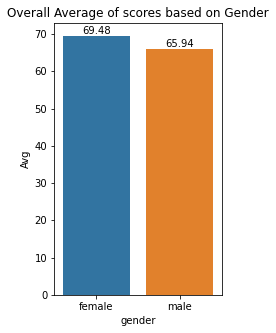

In [11]:
plt.figure(figsize=(3,5))
plt.title('Overall Average of scores based on Gender')
ax=sns.barplot(x='gender', y="Avg", data=df3)
ax.bar_label(ax.containers[0])

Gender-wise highest average(69.48) is scored by Females 

### 3. Who scores the most on average for math, reading and writing based on b) Test preparation course

In [13]:
df4=df.groupby('test preparation course')['Avg'].mean().round(2).reset_index() #  finding the average based on Test preparation course
df4

,test preparation course,Avg
0,completed,72.94
1,none,64.89


[Text(0, 0, '72.94'), Text(0, 0, '64.89')]

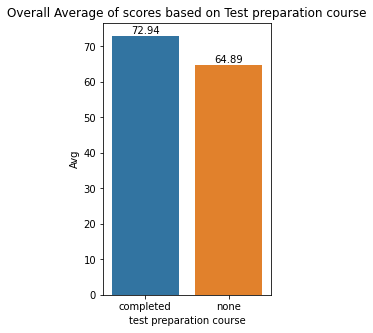

In [14]:
plt.figure(figsize=(3,5))
plt.title('Overall Average of scores based on Test preparation course')
ax=sns.barplot(x='test preparation course', y="Avg", data=df4)
ax.bar_label(ax.containers[0])

Test preparation course-wise highest average(72.94) is scored for Completed

### 4. What do you think about the scoring variation for math, reading and writing based on a)Gender

In [55]:
df5=df.groupby("gender")['math score'].std().round(2).reset_index(name='std_deviation_math_score')
print(df5,"\n\n") # std deviation for math score based on gender
d51=df.groupby("gender")['reading score'].std().round(2).reset_index(name='std_deviation_reading_score')
print(d51,"\n\n") # std deviation for reading score based on gender
d52=df.groupby("gender")['writing score'].std().round(2).reset_index(name='std_deviation_writing_score')
print(d52)# std deviation for writing score based on gender

   gender  std_deviation_math_score
0  female                     16.03
1    male                     14.56 


   gender  std_deviation_reading_score
0  female                        14.41
1    male                        14.15 


   gender  std_deviation_writing_score
0  female                        14.84
1    male                        14.23


The standard deviation is comparitively lower for males than for females in all 3 scores i.e math score, reading score and writing score

As the standard deviation is less for males, it means the scores are more consistent for males than females

### 4. What do you think about the scoring variation for math, reading and writing based on b)Test preparation course

In [50]:
df6=df.groupby("test preparation course")['math score'].std().round(2).reset_index(name='std_deviation_math_score')
print(df6,"\n\n") # std deviation for math score based on test preparation course
d1=df.groupby("test preparation course")['reading score'].std().round(2).reset_index(name='std_deviation_reading_score')
print(d1,"\n\n") # std deviation for reading score based on test preparation course
d2=df.groupby("test preparation course")['writing score'].std().round(2).reset_index(name='std_deviation_writing_score')
print(d2)# std deviation for writing score based on test preparation course


  test preparation course  std_deviation_math_score
0               completed                     14.52
1                    none                     15.71 


  test preparation course  std_deviation_reading_score
0               completed                        13.54
1                    none                        14.61 


  test preparation course  std_deviation_writing_score
0               completed                        13.24
1                    none                        15.04


The standard deviation for all 3 scores i.e math score, reading score and writing score are comparitively lower for test preparation course under completed. Hence the Test preparation course under 'Completed' has more consistent scores when compared to 'None'

### 5. The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this

In [57]:
# for sorting data primarily on basis of math score. If there are multiple similar math scores, then secondary sorting is done using reading score and tertiary sorting using writing score
df7 = df.sort_values(by=['math score','reading score','writing score'],ascending=[False,False,False])
df7.head(round(len(df.index)*.25)) # displays the top 25% math scorers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avg
516,female,group E,bachelor's degree,standard,none,100,100,100,100.00
517,female,group E,associate's degree,standard,none,100,100,100,100.00
999,male,group E,bachelor's degree,standard,completed,100,100,100,100.00
998,male,group E,associate's degree,free/reduced,completed,100,100,93,97.67
997,male,group D,some college,standard,completed,100,97,99,98.67
...,...,...,...,...,...,...,...,...,...
853,male,group D,associate's degree,free/reduced,none,77,78,73,76.00
427,female,group D,associate's degree,standard,none,77,77,73,75.67
856,male,group E,some high school,standard,completed,77,76,77,76.67
855,male,group E,associate's degree,free/reduced,completed,77,69,68,71.33


<AxesSubplot:title={'center':'Box plot for math score'}, xlabel='math score'>

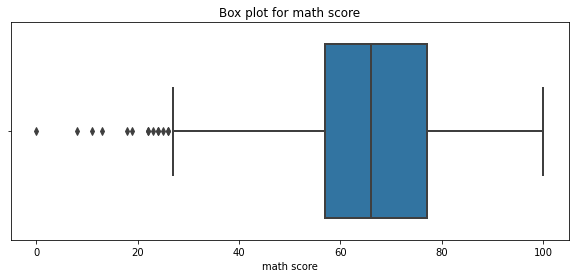

In [58]:
plt.figure(figsize = (10, 4))
plt.title("Box plot for math score")
sns.boxplot(data=df, x='math score',linewidth=2)


From the above box-plot the range of values above the third quartile aligns with the top 25% math scores